Begin by importing the necessary Python Modules.

In [2]:
import pandas as pd #For dataset management
import numpy as np #For Matrix Functions
import matplotlib.pyplot as plt #For data visualization.
import statsmodels.api as sm #For creating the Regression Model
from statsmodels.graphics.regressionplots import abline_plot #Used for visualizing the Regression Line

Import and inspect the dataset.
In this notebook, we will be looking at the ISLR Advertising data, specifically the relationship between the TV advertising budget and resulting sales.

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2   12.0
3  151.5   16.5
4  180.8   17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB

Max TV Budget: 296.4
Min TV Budget: 0.7



Text(0.5, 1.0, 'Advertising Budget Compared with Sales')

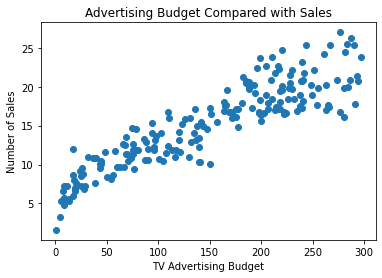

In [11]:
data = pd.read_csv('Datasets/advertising_ISLR.csv', header = 'infer') #Importing Data
data.drop(['Newspaper', 'Radio'], axis = 1, inplace = True) #Dropping unnecessary Columns
print(data.head()) #Viewing first five entries.
print('\n')
data.info() #Viewing column contents.
X, Y = data['TV'], data['Sales']
print('\nMax TV Budget: {}\nMin TV Budget: {}\n'.format(max(X), min(X)))
plt.scatter(X, Y)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Number of Sales')
plt.title('Advertising Budget Compared with Sales')

Here we can see the following about the data:
-There are two columns consisting of 200 float entries.
-Generating a scatterplot indicates a strong, positive linear relationship between the two variables.

To quantify this relationship, we shall generate a linear regression model.
Statsmodels offers the capacity to manually enter a constant. This is necessary in order to generate an appropriate intercept point. Without it, the intercept will be assumed to originate at 0.0 sales, which is not observably true.

The model summary is shown below:

In [12]:
model = sm.OLS(Y, sm.add_constant(X, prepend = True))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           7.93e-74
Time:                        10:52:45   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

We wish to not only visualize the regression line, but also the prediction interval boundaries.
To this end, we will create two functions that will predict the minimum response - where X is 0 - and the maximum response - where X = max(X).

In [13]:
def prediction_upper(value):
    answer = 7.611 + value*0.059
    return answer
def prediction_lower(value):
    answer = 6.339 + value * 0.052
    return answer

Below is the full visualization:

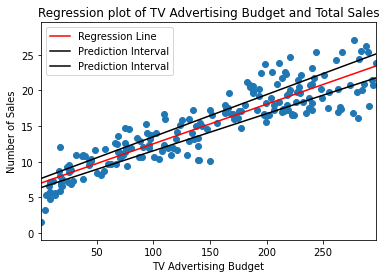

In [18]:
fig = abline_plot(model_results = results, color='red', label='Regression Line')
ax = fig.axes[0]
ax.scatter(X, Y)
plt.plot([0, max(X)],[prediction_upper(0), prediction_upper(max(X))], color='black', label='Prediction Interval')
plt.plot([0, max(X)],[prediction_lower(0), prediction_lower(max(X))], color='black', label='Prediction Interval')
ax.margins(.1)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Number of Sales')
plt.title('Regression plot of TV Advertising Budget and Total Sales')
plt.legend()
plt.show()